# Titanic Dataset Exploration

***The Dataset is taken from the Kaggle Titanic Disaster Dataset.***   
_The data is split into two datasets namely *Train* dataset and *Test* Dataset._

*Importing the relevant libraries*

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

*Loading the Train Dataset*

In [3]:
train = pd.read_csv('train.csv', sep=',')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

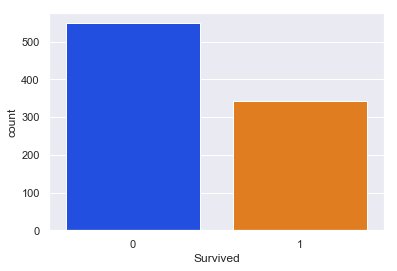

In [6]:
sns.countplot('Survived', data=train, palette='bright')
plt.show()

In [7]:
train['Survived'].count()

891

In [8]:
survived_list = train['Survived'].values

In [9]:
survived_total = 0
for i in survived_list:
    if i == 1:
        survived_total +=1

In [10]:
survived_total

342

*Here we can see that out of total 891 people only 342 people actually survived the disaster*   

Checking the features now.

In [11]:
train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

*We can see from the summary that 233 females survived, 109 males survived out of total 891 people.*

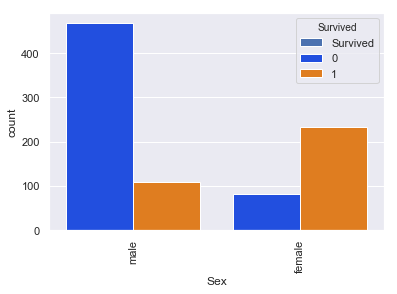

In [12]:
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
sns.countplot('Sex',data=train, hue='Survived', palette='bright')

*We can easily see that ratio of survived females to total females is more than that of males.*

Text(0.5, 1.0, 'Pclass: Dead vs Survived')

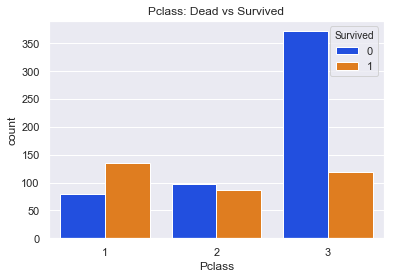

In [13]:
sns.countplot('Pclass', hue='Survived', data=train, palette='bright')
plt.title('Pclass: Dead vs Survived')

*So, here for the survival Money matters. Money can buy everything, right? Survival rate is higher in Class 1 and Class 2 while quite lower in Class 3.*

In [14]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='autumn_r')

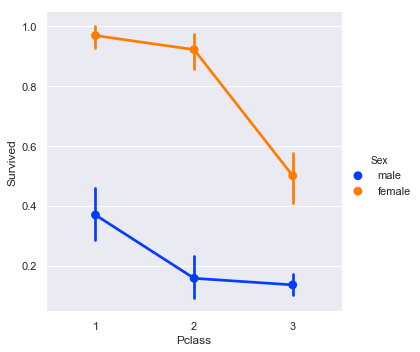

In [15]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train, palette='bright')
plt.show()

*Looking at the CrossTab and FactorPlot it can be clarified that women were given priority during rescue over men irrespective of the Class.*

In [16]:
print('Average Age of Survived Person was: ',train['Age'].mean())

Average Age of Survived Person was:  29.69911764705882


In [17]:
print('Minimum Age of Survived Person was: ',train['Age'].min())

Minimum Age of Survived Person was:  0.42


In [18]:
print('Maximum Age of Survived Person was: ',train['Age'].max())

Maximum Age of Survived Person was:  80.0


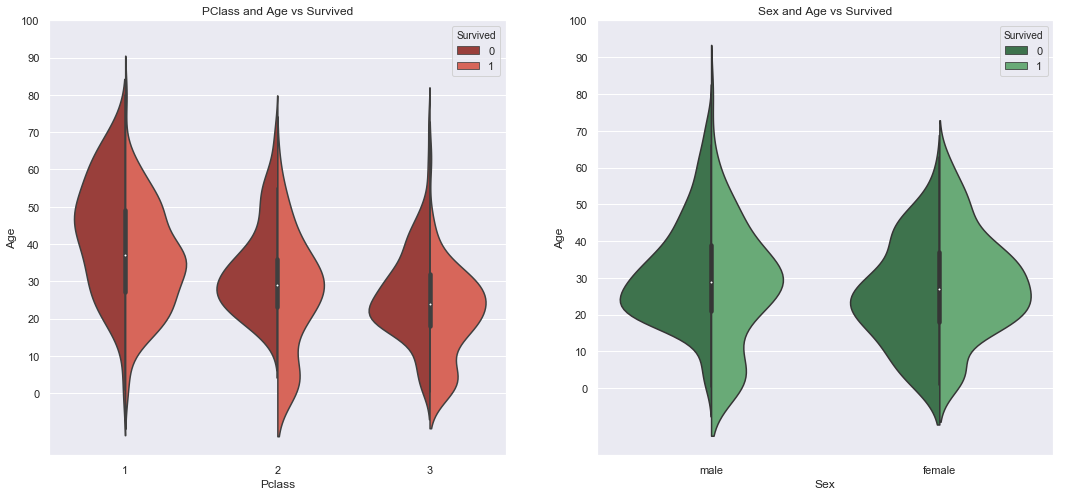

In [19]:
f,ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=train,split=True,ax=ax[0], palette='Reds_d')
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train,split=True,ax=ax[1], palette='Greens_d')
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

*If we look at the above violin plots we can conclude that* -

- The number of survived children is increasing from Class 1 to Class 3.
- The number of children is more in Class 3 than in Class 1.
- Survival rate is better for women and between age of 20 and 30 is quite well.  

***It is important to note that 177 Values are Null in Age***    
*We have to fill these 177 NaN Values but we can't fill them by taking mean. Let's look at the name factor or the name titles like Mr, Mrs, Ms, Master, etc.*

In [20]:
train['Initial']= 0
for i in train:
    train['Initial']= train.Name.str.extract('([A-Za-z]+)\.')

In [21]:
pd.crosstab(train.Initial, train.Sex).T.style.background_gradient(cmap='cool')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


*Let's replace irrelevant titles with meaningful one.*

In [22]:
train['Initial'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Mlle','Mme','Ms','Rev','Sir'],['Mr','Unknown','Mrs','Mr','Mr','Unknown','Mrs','Mr','Miss','Miss','Miss','Unknown','Mr'],inplace=True)

In [23]:
train.groupby('Initial')['Age'].mean()

Initial
Master      4.574167
Miss       21.860000
Mr         32.739609
Mrs        35.981818
Unknown    45.888889
Name: Age, dtype: float64

In [24]:
train.loc[(train.Age.isnull()) & (train.Initial=='Master'), 'Age']=5
train.loc[(train.Age.isnull()) & (train.Initial=='Miss'), 'Age']=22
train.loc[(train.Age.isnull()) & (train.Initial=='Mr'), 'Age']=33
train.loc[(train.Age.isnull()) & (train.Initial=='Mrs'), 'Age']=36
train.loc[(train.Age.isnull()) & (train.Initial=='Unknown'), 'Age']=46

In [25]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

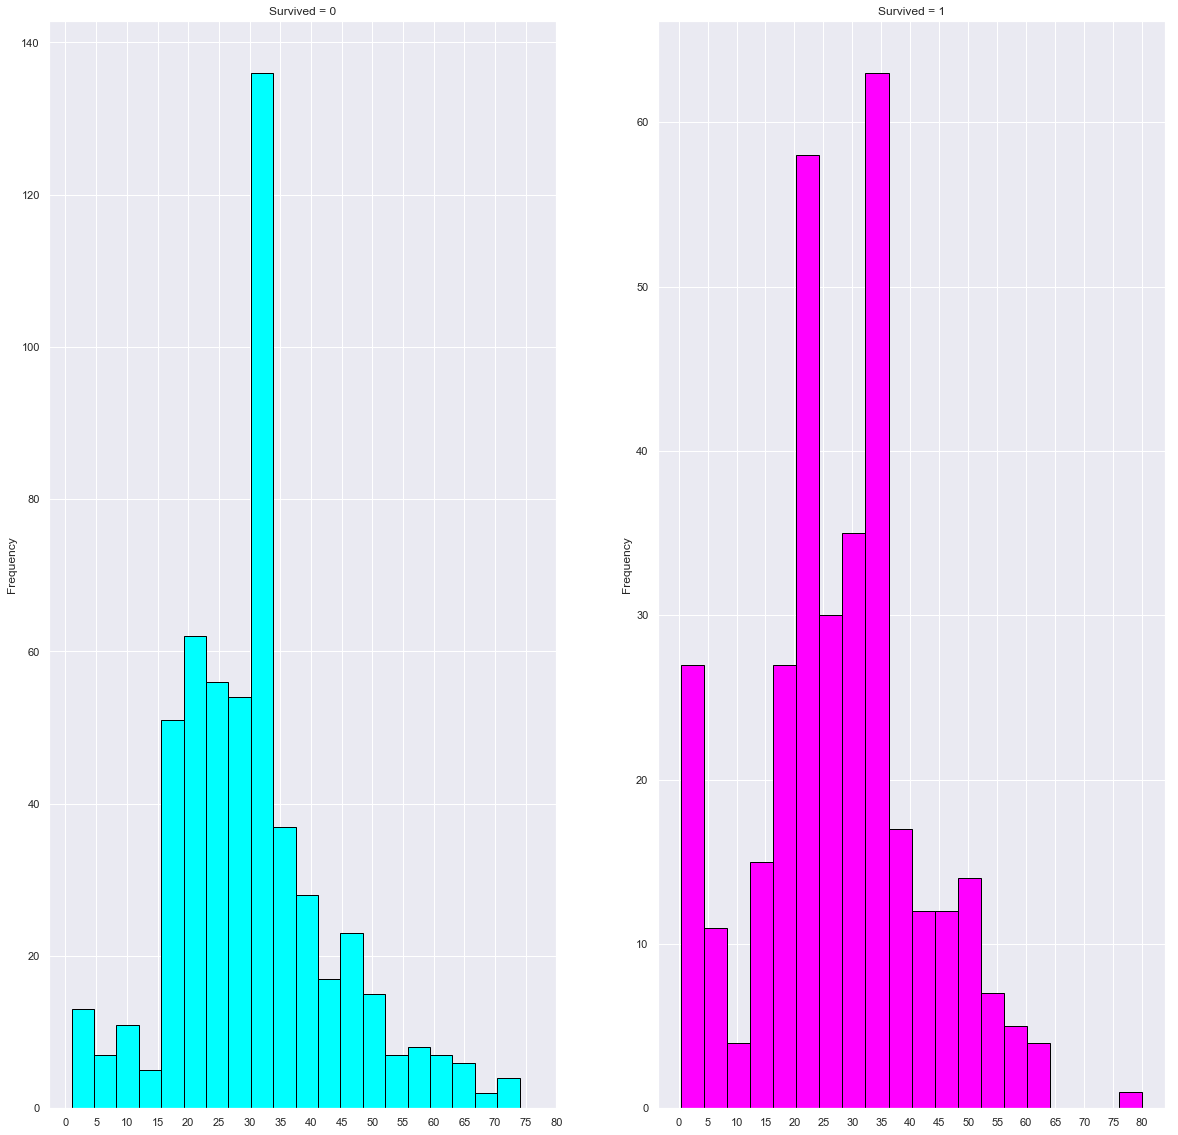

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,20))
train[train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='cyan')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='magenta')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('Survived = 1')
plt.show()


*Here we can see that*   
- Priority for Rescue is given to the children
- Oldest survived passenger is 80 years old.

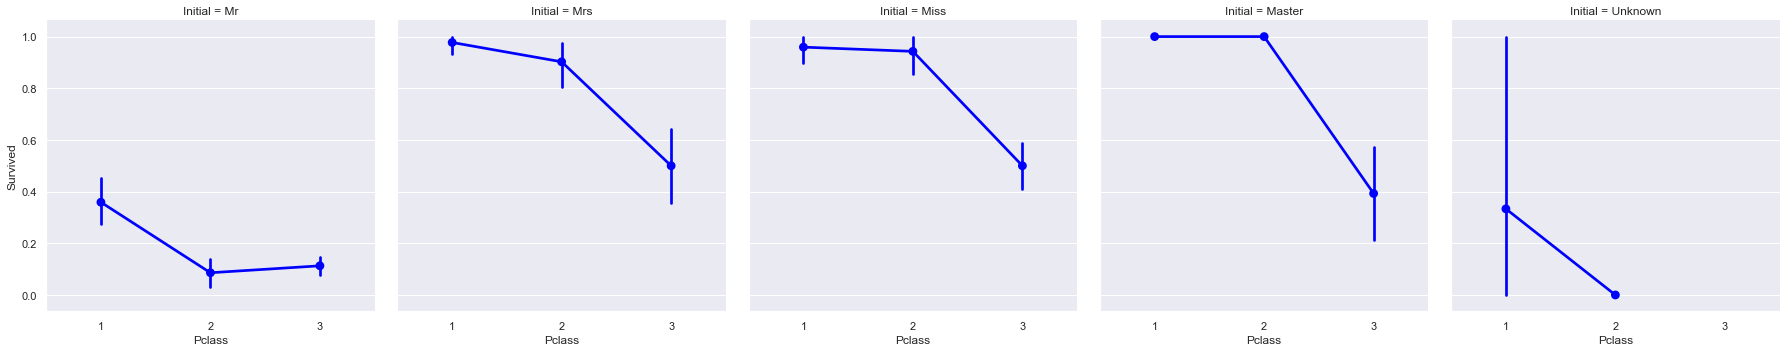

In [27]:
sns.factorplot('Pclass','Survived', data=train, col='Initial', color='blue', size=5, aspect=1)
plt.show()

*We can deduce from the above factor plots that women and children were given first priority for rescue irrespective of their class.*